# Statistical Analysis - Part 1

In [1]:
import pandas as pd
from collections import Counter

import numpy as np

from multiprocessing import Pool

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import math

from tqdm import tqdm
import time

from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from scipy import stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
physio_data = pd.read_csv('../data_output/physio_data_sta.csv')

In [ ]:
physio_data

In [ ]:
physio_data.describe().T

In [ ]:
physio_data[physio_data['weight'] >= 300.0]

In [ ]:
physio_data[physio_data['Inspired O2 Fraction'] >= 1000.0]

In [ ]:
physio_data_example = physio_data[~physio_data['subject_id'].isin([17146833, 18902162, 13870935, 12584911])]


In [ ]:
physio_data_example.describe().T

In [ ]:
physio_data.info()

In [ ]:
physio_data[['stay_id', 'readmission_count', 'death_in_ICU', 'death_out_ICU', 'epoch']].head(60)

In [ ]:
Counter(physio_data['readmission_count'])

In [ ]:
# physio_data_rd_1 = physio_data[physio_data['readmission_count'] == 0]
physio_data_rd_1 = physio_data.copy()

In [ ]:
physio_data_rd_1.info()

In [ ]:
# Extract the first decision epoch
physio_data_rd_1_first = physio_data[physio_data['epoch'] == 1].copy()

In [ ]:
# physio_data_rd_1_first

In [ ]:
# physio_data_rd_1_first['gender'] = physio_data_rd_1_first['M'].replace({0: 'female', 1: 'male'})

In [ ]:
# physio_data_rd_1_first['gender'] 

In [ ]:
# physio_data_rd_1_first.columns

In [ ]:
# cols_to_add_missing = ['Magnesium', 'HCO3 (serum)', 'PH (Arterial)']

In [ ]:
# missing_rates = {'Magnesium': 0.18, 'HCO3 (serum)': 0.36, 'PH (Arterial)':0.29} 

# for col, rate in missing_rates.items():
#     missing_indices = np.random.choice(
#         physio_data_rd_1_first.index, 
#         size = int(len(physio_data_rd_1_first) * rate), 
#         replace = False
#     )
#     physio_data_rd_1_first.loc[missing_indices, col] = np.nan

In [ ]:
# physio_data_rd_1_first.info()

In [ ]:
# physio_data_rd_1_first.columns

In [ ]:
# output_table = physio_data_rd_1_first.sample(n = 3000)

In [ ]:
# icu_data_example = output_table[['stay_id', 'los', 'age', 'gender', 'weight', 'Heart Rate', 'Arterial O2 pressure', 
#                                  'Magnesium', 'HCO3 (serum)', 'PH (Arterial)']]

In [ ]:
# icu_data_additional = output_table[['stay_id', 'Temperature C']]

In [ ]:
# icu_data_example.to_csv('../data_output/icu_data_example.csv', index = False)
# icu_data_additional.to_csv('../data_output/icu_data_additional.csv', index = False)

In [ ]:
physio_data_rd_1_first_fail = physio_data_rd_1_first[physio_data_rd_1_first['discharge_fail'] == 1]
physio_data_rd_1_first_success = physio_data_rd_1_first[physio_data_rd_1_first['discharge_fail'] == 0]

In [ ]:
sns.barplot(x = 'death_out_ICU', y = 'los', data = physio_data_rd_1_first)
plt.show()

In [ ]:
sns.barplot(x = 'discharge_fail', y = 'los', data = physio_data_rd_1_first)
plt.show()

## Relationship between mortality risk and readmission count.

- Death in ICU

In [ ]:
# Extract the first decision epoch
physio_data_epoch_first = physio_data[physio_data['epoch'] == 1].copy()

In [ ]:
[physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 0]['death_in_ICU'].mean(),
 physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 1]['death_in_ICU'].mean(),
 physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 2]['death_in_ICU'].mean(),
 physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 3]['death_in_ICU'].mean(),
 physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 4]['death_in_ICU'].mean()]

In [ ]:
sns.barplot(x = 'readmission_count', y = 'death_in_ICU', data = physio_data_epoch_first)
plt.show()

In [ ]:
# Set the style for publication-quality plots
plt.style.use('seaborn-darkgrid')
sns.set_context("paper", font_scale=1.2)

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Enhanced bar plot with error bars
sns.barplot(x='readmission_count', 
            y='death_in_ICU', 
            data=physio_data_epoch_first,
            ci=95,  # 95% confidence intervals
            color='steelblue',
            ax=ax1)

ax1.set_title('ICU Mortality by Readmission Count\nwith 95% CI', pad=15)
ax1.set_xlabel('Number of Readmissions')
ax1.set_ylabel('Mortality Rate')
ax1.tick_params(axis='x', rotation=0)

# 2. Box plot to show distribution
sns.boxplot(x='readmission_count', 
            y='death_in_ICU',
            data=physio_data_epoch_first,
            color='lightsteelblue',
            ax = ax2)

ax2.set_title('Distribution of ICU Mortality\nby Readmission Count', pad=15)
ax2.set_xlabel('Number of Readmissions')
ax2.set_ylabel('Mortality Rate')

# Adjust layout
plt.tight_layout()
plt.show()

# Additional statistical visualization
plt.figure(figsize=(10, 6))

# Point plot with error bars and line connection
sns.pointplot(x='readmission_count', 
             y='death_in_ICU',
             data=physio_data_epoch_first,
             ci=95,
             color='darkblue',
             markers='o',
             linestyles='-',
             capsize=0.1)

plt.title('Trend of ICU Mortality with Readmission Count\nwith 95% CI', pad=15)
plt.xlabel('Number of Readmissions')
plt.ylabel('Mortality Rate')

# Add a trend line if needed
readmission_counts = physio_data_epoch_first['readmission_count'].unique()
mean_deaths = [physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == count]['death_in_ICU'].mean() 
               for count in readmission_counts]

# Optional: Add statistical annotations
plt.text(0.02, 0.98, 
         f'n = {len(physio_data_epoch_first)}',
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top')

plt.tight_layout()
plt.show()

In [ ]:
# Optional: Statistical summary
print("\nStatistical Summary:")
print(physio_data_epoch_first.groupby('readmission_count')['death_in_ICU'].agg(['count', 'mean', 'std']).round(3))

- Death out of ICU (30 days now)


In [ ]:
[physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 0]['death_out_ICU'].mean(),
 physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 1]['death_out_ICU'].mean(),
 physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 2]['death_out_ICU'].mean(),
 physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 3]['death_out_ICU'].mean(),
 physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 4]['death_out_ICU'].mean()]

In [ ]:
sns.barplot(x = 'readmission_count', y = 'death_out_ICU', data = physio_data_epoch_first)
plt.show()

In [ ]:
condition = (physio_data_epoch_first['death_in_ICU'] == 1) | (physio_data_epoch_first['death_out_ICU'] == 1)

physio_data_epoch_first['pa_death'] = 0.0
physio_data_epoch_first.loc[condition, 'pa_death'] = 1.0

In [ ]:
sns.barplot(x = 'readmission_count', y = 'pa_death', data = physio_data_epoch_first)
plt.show()

In [ ]:
correlation = physio_data_epoch_first['pa_death'].corr(physio_data_epoch_first['discharge_fail'])

In [ ]:
print(correlation)

In [ ]:
sns.heatmap(physio_data_epoch_first[['pa_death', 'discharge_fail']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
plt.scatter(physio_data_epoch_first['pa_death'], physio_data_epoch_first['discharge_fail'])
plt.xlabel('death')
plt.ylabel('discharge_fail')
plt.show()

In [ ]:
# Set the aesthetic style of the plots
plt.style.use('seaborn-whitegrid')
sns.set_context("paper", font_scale = 1.4)

# Create the figure with a specific size for better proportions
plt.figure(figsize = (10, 6))

# Create a color palette - using a blue palette that's colorblind-friendly
palette = sns.color_palette("Blues_d", len(physio_data_epoch_first['readmission_count'].unique()))

# Create the barplot with error bars and improved aesthetics
ax = sns.barplot(
    x = 'readmission_count', 
    y = 'pa_death', 
    data = physio_data_epoch_first,
    palette = palette,
    errorbar = ('ci', 95),  # Add 95% confidence intervals
    capsize = 0.2           # Add caps to error bars
)

# Add value labels on top of each bar
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2.,
        height + 0.005,  # Small offset above the bar
        f'{height:.3f}',
        ha = 'center',
        va = 'bottom',
        fontsize = 12
    )

# Improve the axes labels and title
plt.xlabel('Number of Readmissions', fontweight = 'bold')
plt.ylabel('Probability of Adverse Death', fontweight = 'bold')
plt.title('Relationship Between Readmission Count and Mortality', fontsize = 16, pad = 20)

# If x-axis represents counts, ensure they're integers
ax.xaxis.set_major_locator(mtick.MaxNLocator(integer=True))

# Ensure the y-axis starts from 0 for proper visual comparison
plt.ylim(bottom = 0)

# Add a light grid for easier reading of values
ax.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# Add a note about the confidence intervals
plt.annotate('Error bars represent 95% confidence intervals', 
             xy = (0.5, -0.15), 
             xycoords = 'axes fraction', 
             ha = 'center', 
             fontsize = 10, 
             style = 'italic')

# Adjust layout to make room for labels
plt.tight_layout()

# Save the figure with high resolution if needed
plt.savefig('../Experiment Figure/EDA_figures/readmission_mortality.png', dpi = 300, bbox_inches = 'tight')

# Show the plot
plt.show()

## Relationship between readmission risk and readmission count.

In [ ]:
physio_data_epoch_first.info()

In [ ]:
[physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 0]['discharge_fail'].mean(),
 physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 1]['discharge_fail'].mean(),
 physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 2]['discharge_fail'].mean(),
 physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 3]['discharge_fail'].mean(),
 physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 4]['discharge_fail'].mean()]

In [ ]:
sns.barplot(x = 'readmission_count', y = 'discharge_fail', data = physio_data_epoch_first)
plt.show()

In [ ]:
physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 4][['subject_id', 'stay_id', 'discharge_fail', 'readmission_count', 'death_in_ICU', 'death_out_ICU']]

In [ ]:
physio_data

## Relationship between lenth-of-stay in ICU and readmission count.

In [ ]:
[physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 0]['los'].mean(),
 physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 1]['los'].mean(),
 physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 2]['los'].mean(),
 physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 3]['los'].mean(),
 physio_data_epoch_first[physio_data_epoch_first['readmission_count'] == 4]['los'].mean()]

In [ ]:
sns.barplot(x = 'readmission_count', y = 'los', data = physio_data_epoch_first)
plt.show()

In [ ]:
physio_data['los'].describe().T

In [ ]:
# physio_data['los_costs'].describe().T

# Statistical Analysis - Part 2

In [3]:
id_table_train = pd.read_csv('../data_output/id_table_train_v13.csv')
rl_table_train = pd.read_csv('../data_output/rl_table_train_v13.csv')
rl_table_train_scaled = pd.read_csv('../data_output/rl_table_train_scaled_v13.csv')

In [4]:
id_table_val = pd.read_csv('../data_output/id_table_val_v13.csv')
rl_table_val = pd.read_csv('../data_output/rl_table_val_v13.csv')
rl_table_val_scaled = pd.read_csv('../data_output/rl_table_val_scaled_v13.csv')

In [5]:
id_table_test = pd.read_csv('../data_output/id_table_test_v13.csv')
rl_table_test = pd.read_csv('../data_output/rl_table_test_v13.csv')
rl_table_test_scaled = pd.read_csv('../data_output/rl_table_test_scaled_v13.csv')

In [6]:
id_table_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393856 entries, 0 to 393855
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   subject_id            393856 non-null  int64  
 1   hadm_id               393856 non-null  int64  
 2   stay_id               393856 non-null  int64  
 3   time                  393856 non-null  object 
 4   discharge_action      393856 non-null  float64
 5   epoch                 393856 non-null  int64  
 6   icu_starttime         393856 non-null  object 
 7   icu_endtime           393856 non-null  object 
 8   los                   393856 non-null  float64
 9   discharge_fail        393856 non-null  float64
 10  readmission           393856 non-null  int64  
 11  readmission_count     393856 non-null  int64  
 12  death_in_ICU          393856 non-null  int64  
 13  death_out_ICU         393856 non-null  int64  
 14  qSOFA                 393856 non-null  int64  
 15  

In [7]:
rl_table_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393856 entries, 0 to 393855
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       393856 non-null  float64
 1   M                         393856 non-null  float64
 2   weight                    393856 non-null  float64
 3   Heart Rate                393856 non-null  float64
 4   Arterial O2 pressure      393856 non-null  float64
 5   Hemoglobin                393856 non-null  float64
 6   Arterial CO2 Pressure     393856 non-null  float64
 7   PH (Venous)               393856 non-null  float64
 8   Hematocrit (serum)        393856 non-null  float64
 9   WBC                       393856 non-null  float64
 10  Chloride (serum)          393856 non-null  float64
 11  Creatinine (serum)        393856 non-null  float64
 12  Glucose (serum)           393856 non-null  float64
 13  Magnesium                 393856 non-null  f

In [8]:
rl_table_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393856 entries, 0 to 393855
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       393856 non-null  float64
 1   M                         393856 non-null  float64
 2   weight                    393856 non-null  float64
 3   Heart Rate                393856 non-null  float64
 4   Arterial O2 pressure      393856 non-null  float64
 5   Hemoglobin                393856 non-null  float64
 6   Arterial CO2 Pressure     393856 non-null  float64
 7   PH (Venous)               393856 non-null  float64
 8   Hematocrit (serum)        393856 non-null  float64
 9   WBC                       393856 non-null  float64
 10  Chloride (serum)          393856 non-null  float64
 11  Creatinine (serum)        393856 non-null  float64
 12  Glucose (serum)           393856 non-null  float64
 13  Magnesium                 393856 non-null  f

In [9]:
rl_table_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,393856.0,63.908152,16.036702,18.000000,54.000000,65.000000,76.000000,91.000000
M,393856.0,0.576772,0.494072,0.000000,0.000000,1.000000,1.000000,1.000000
weight,393856.0,82.749625,35.776076,0.000000,66.541946,79.300000,94.982165,8106.000000
Heart Rate,393856.0,85.489183,16.351815,13.500000,73.727273,84.250000,96.000000,167.000000
Arterial O2 pressure,393856.0,123.904643,46.200886,0.000000,90.600000,114.400000,147.000000,300.000000
Hemoglobin,393856.0,9.902724,1.893896,2.100000,8.500000,9.600000,11.100000,18.200000
Arterial CO2 Pressure,393856.0,41.198398,7.743124,8.666667,36.607143,40.400000,44.820000,78.000000
PH (Venous),393856.0,7.377011,0.057719,7.030000,7.350000,7.381000,7.411000,7.710000
Hematocrit (serum),393856.0,30.222009,5.458172,6.900000,26.200000,29.400000,33.500000,53.900000
WBC,393856.0,11.265371,5.476172,0.100000,7.600000,10.300000,13.800000,37.050000


In [10]:
[len(rl_table_train_scaled), 
 len(rl_table_val_scaled),
 len(rl_table_test_scaled)]

[393856, 48393, 49747]

In [11]:
393856 + 48393 + 49747

491996

In [12]:
summary_stats = rl_table_train.describe().T

summary_stats.insert(0, "Category", "Clinical Information")

latex_table = summary_stats.to_latex(
    index = True,
    columns = ["mean", "std", "min", "25%", "50%", "75%", "max"],
    header = ["Mean", "SD", "Min", "Q1", "Q2", "Q3", "Max"],
    float_format = "%.2f",  
    column_format = "llcccc",  
    caption = "Summary statistics of the study samples.",
    label = "tab:summary_stats",
    longtable = False,
    escape = False  
)

print(latex_table)

\begin{table}
\caption{Summary statistics of the study samples.}
\label{tab:summary_stats}
\begin{tabular}{llcccc}
\toprule
 & Mean & SD & Min & Q1 & Q2 & Q3 & Max \\
\midrule
age & 63.91 & 16.04 & 18.00 & 54.00 & 65.00 & 76.00 & 91.00 \\
M & 0.58 & 0.49 & 0.00 & 0.00 & 1.00 & 1.00 & 1.00 \\
weight & 82.75 & 35.78 & 0.00 & 66.54 & 79.30 & 94.98 & 8106.00 \\
Heart Rate & 85.49 & 16.35 & 13.50 & 73.73 & 84.25 & 96.00 & 167.00 \\
Arterial O2 pressure & 123.90 & 46.20 & 0.00 & 90.60 & 114.40 & 147.00 & 300.00 \\
Hemoglobin & 9.90 & 1.89 & 2.10 & 8.50 & 9.60 & 11.10 & 18.20 \\
Arterial CO2 Pressure & 41.20 & 7.74 & 8.67 & 36.61 & 40.40 & 44.82 & 78.00 \\
PH (Venous) & 7.38 & 0.06 & 7.03 & 7.35 & 7.38 & 7.41 & 7.71 \\
Hematocrit (serum) & 30.22 & 5.46 & 6.90 & 26.20 & 29.40 & 33.50 & 53.90 \\
WBC & 11.27 & 5.48 & 0.10 & 7.60 & 10.30 & 13.80 & 37.05 \\
Chloride (serum) & 103.25 & 6.39 & 75.00 & 99.20 & 103.50 & 107.00 & 131.00 \\
Creatinine (serum) & 1.33 & 0.97 & 0.00 & 0.70 & 1.00 & 1.58 & 

In [13]:
Counter(rl_table_train_scaled['readmission_count'])

Counter({0.0: 269319,
         1.0: 74313,
         2.0: 28684,
         3.0: 13380,
         4.0: 5599,
         5.0: 2561})

- Threshold settings for length-of-stay in ICU

In [14]:
id_table_train_first_epoch = id_table_train[id_table_train['epoch'] == 1].copy()
id_table_train_last_epoch = id_table_train[id_table_train['discharge_action'] == 1].copy()

In [15]:
id_table_val_first_epoch = id_table_val[id_table_val['epoch'] == 1].copy()
id_table_val_last_epoch = id_table_val[id_table_val['discharge_action'] == 1].copy()

In [16]:
id_table_test_first_epoch = id_table_test[id_table_test['epoch'] == 1].copy()
id_table_test_last_epoch = id_table_test[id_table_test['discharge_action'] == 1].copy()

In [17]:
patient_list_train = pd.unique(id_table_train_first_epoch['subject_id'])
patient_list_val = pd.unique(id_table_val_first_epoch['subject_id'])
patient_list_test = pd.unique(id_table_test_first_epoch['subject_id'])

In [18]:
stayid_list_train = pd.unique(id_table_train_first_epoch['stay_id'])
stayid_list_val = pd.unique(id_table_val_first_epoch['stay_id'])
stayid_list_test = pd.unique(id_table_test_first_epoch['stay_id']) 

In [19]:
[len(patient_list_train), len(patient_list_val), len(patient_list_test)]

[39664, 4958, 4959]

In [20]:
39664 + 4958 + 4959

49581

In [21]:
[len(stayid_list_train), len(stayid_list_val), len(stayid_list_test)]

[54905, 6880, 6868]

In [22]:
54905 + 6880 + 6868

68653

In [23]:
Counter(id_table_train_first_epoch['readmission_count'])

Counter({0: 47865, 1: 5715, 2: 1012, 3: 233, 4: 60, 5: 20})

In [24]:
Counter(id_table_val_first_epoch['readmission_count'])

Counter({0: 5954, 1: 746, 2: 145, 3: 27, 4: 6, 5: 2})

In [25]:
Counter(id_table_test_first_epoch['readmission_count'])

Counter({0: 5996, 1: 715, 2: 122, 3: 23, 4: 9, 5: 3})

In [26]:
id_table_train_first_epoch['los'].describe()

count    54905.000000
mean         2.643148
std          2.485884
min          0.003345
25%          1.075278
50%          1.825891
75%          3.170521
max         14.994942
Name: los, dtype: float64

In [27]:
2.649393 * 24

63.585432

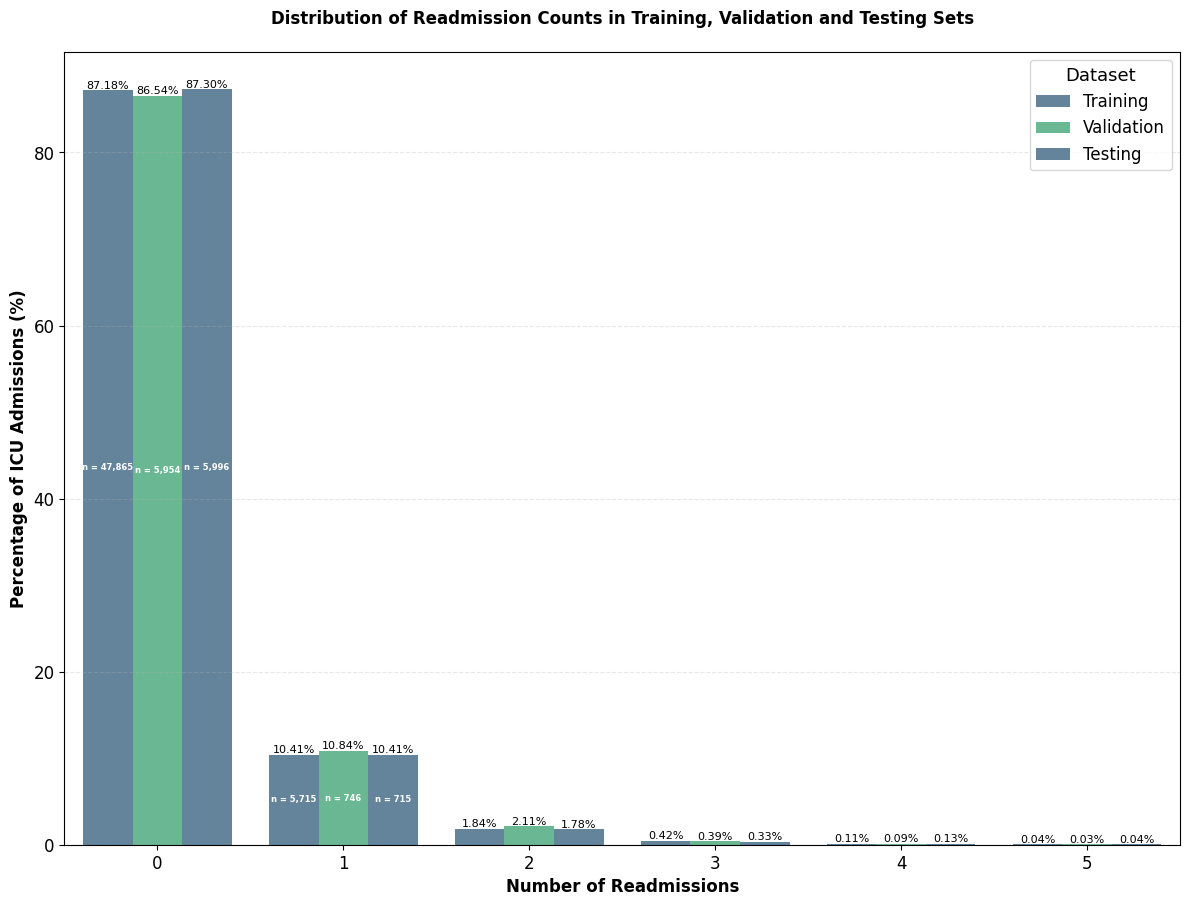

In [28]:
# Create DataFrames from your Counter objects
train_data = pd.DataFrame({
    'readmission_count': [0, 1, 2, 3, 4, 5],
    'frequency': [47865, 5715, 1012, 233, 60, 20],
    'dataset': 'Training'
})

val_data = pd.DataFrame({
    'readmission_count': [0, 1, 2, 3, 4, 5],
    'frequency': [5954, 746, 145, 27, 6, 2],
    'dataset': 'Validation'
})

test_data = pd.DataFrame({
    'readmission_count': [0, 1, 2, 3, 4, 5],
    'frequency': [5996, 715, 122, 23, 9, 3],
    'dataset': 'Testing'
})

# Combine the data
combined_data = pd.concat([train_data, val_data, test_data])

# Calculate percentages for each dataset
for dataset in ['Training', 'Validation', 'Testing']:
    dataset_total = combined_data[combined_data['dataset'] == dataset]['frequency'].sum()
    combined_data.loc[combined_data['dataset'] == dataset, 'percentage'] = (
        combined_data.loc[combined_data['dataset'] == dataset, 'frequency'] / dataset_total * 100
    )

# Set up the figure with a larger size for better readability
plt.figure(figsize = (12, 10))

# Create a custom color palette
colors = sns.color_palette("viridis", 2)

# Create the grouped bar chart with percentages
ax = sns.barplot(
    x = 'readmission_count', 
    y = 'percentage', 
    hue = 'dataset',
    data = combined_data,
    palette = colors,
    alpha = 0.8
)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f%%', fontsize = 8)

# Add count annotations inside the bars
for i, bar in enumerate(ax.patches):
    if bar.get_height() > 3:  # Only annotate bars tall enough to fit text
        count = combined_data.iloc[i]['frequency']
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height()/2,
            f'n = {count:,}',
            ha = 'center',
            va = 'center',
            color = 'white',
            fontsize = '6',
            fontweight = 'bold'
        )

# Improve the labels and title
plt.xlabel('Number of Readmissions', fontsize = 12, fontweight = 'bold')
plt.ylabel('Percentage of ICU Admissions (%)', fontsize = 12, fontweight = 'bold')
plt.title('Distribution of Readmission Counts in Training, Validation and Testing Sets', fontsize = 12, fontweight = 'bold', pad = 20)

# Enhance the legend
plt.legend(title = 'Dataset', fontsize = 12, title_fontsize = 13)

# Add grid lines for easier reading
plt.grid(axis = 'y', linestyle = '--', alpha = 0.3)

# Improve the x-axis ticks
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# # Add a text annotation describing the distribution
# total_train = train_data['frequency'].sum()
# total_test = test_data['frequency'].sum()
# plt.figtext(
#     0.5, 0.01, 
#     f"Training set: {total_train:,} patients | Test set: {total_test:,} patients\n"
#     f"Note: Both datasets show similar distribution patterns with majority of patients having 0 readmissions.",
#     ha='center', fontsize=11, style='italic'
# )

# Ensure the layout is clean
plt.tight_layout()
plt.subplots_adjust(bottom = 0.15)

# Save the figure with high resolution if needed
plt.savefig('../Experiment Figure/EDA_figures/distribution_of_readmission_counts.png', 
            dpi = 400, 
            bbox_inches = 'tight')

# Show the plot
plt.show()

In [29]:
# id_table_train['total_los_costs'] = id_table_train.groupby('stay_id')['los_costs'].cumsum()
# id_table_val['total_los_costs'] = id_table_val.groupby('stay_id')['los_costs'].cumsum()
# id_table_test['total_los_costs'] = id_table_test.groupby('stay_id')['los_costs'].cumsum()

In [30]:
id_table_train.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'time', 'discharge_action', 'epoch',
       'icu_starttime', 'icu_endtime', 'los', 'discharge_fail', 'readmission',
       'readmission_count', 'death_in_ICU', 'death_out_ICU', 'qSOFA', 'death',
       'mortality_costs', 'discharge_fail_costs', 'los_costs',
       'los_costs_scaled', 'safe_action'],
      dtype='object')

In [31]:
id_table_train['mortality_costs_md'] = id_table_train['mortality_costs'].copy()

for i in range(len(id_table_train)):
    if id_table_train['discharge_action'].iloc[i] == 1:
        if id_table_train['death'].iloc[i] == 0:
            id_table_train['mortality_costs_md'].iloc[i] = 0
        else:
            if id_table_train['discharge_fail'].iloc[i] == 1:
                id_table_train['mortality_costs_md'].iloc[i] = 0
            else:
                id_table_train['mortality_costs_md'].iloc[i] = id_table_train['mortality_costs'].iloc[i]
    else:
        id_table_train['mortality_costs_md'].iloc[i] = id_table_train['mortality_costs'].iloc[i]

In [32]:
id_table_val['mortality_costs_md'] = id_table_val['mortality_costs'].copy()

for i in range(len(id_table_val)):
    if id_table_val['discharge_action'].iloc[i] == 1:
        if id_table_val['death'].iloc[i] == 0:
            id_table_val['mortality_costs_md'].iloc[i] = 0
        else:
            if id_table_val['discharge_fail'].iloc[i] == 1:
                id_table_val['mortality_costs_md'].iloc[i] = 0
            else:
                id_table_val['mortality_costs_md'].iloc[i] = id_table_val['mortality_costs'].iloc[i]
    else:
        id_table_val['mortality_costs_md'].iloc[i] = id_table_val['mortality_costs'].iloc[i]

In [33]:
id_table_test['mortality_costs_md'] = id_table_test['mortality_costs'].copy()

for i in range(len(id_table_test)):
    if id_table_test['discharge_action'].iloc[i] == 1:
        if id_table_test['death'].iloc[i] == 0:
            id_table_test['mortality_costs_md'].iloc[i] = 0
        else:
            if id_table_test['discharge_fail'].iloc[i] == 1:
                id_table_test['mortality_costs_md'].iloc[i] = 0
            else:
                id_table_test['mortality_costs_md'].iloc[i] = id_table_test['mortality_costs'].iloc[i]
    else:
        id_table_test['mortality_costs_md'].iloc[i] = id_table_test['mortality_costs'].iloc[i]

In [34]:
# # Create a copy of the 'mortality_costs' column
# id_table_train['mortality_costs_md'] = id_table_train['mortality_costs'].copy()

# # Apply the conditions using vectorized operations
# discharge_action_mask = id_table_train['discharge_action'] == 1
# death_mask = id_table_train['death'] == 0
# discharge_fail_mask = id_table_train['discharge_fail'] == 1

# # Update 'mortality_costs_md' based on the conditions
# id_table_train.loc[discharge_action_mask & death_mask, 'mortality_costs_md'] = 0
# id_table_train.loc[discharge_action_mask & ~death_mask & discharge_fail_mask, 'mortality_costs_md'] = 0

In [35]:
# id_table_train[['subject_id', 'stay_id', 'epoch', 'los_costs', 'total_los_costs']].head(50)

In [36]:
id_table_train['total_los_costs'] = id_table_train['los_costs'].copy()

for i in range(len(patient_list_train)):
    sub_table = id_table_train[id_table_train['subject_id'] == patient_list_train[i]].copy()

    cumulative_los = 0
    
    for j in reversed(range(len(sub_table))):
        if sub_table['readmission'].iloc[j] == 1:
            cumulative_los += sub_table['los_costs'].iloc[j]
            sub_table['total_los_costs'].iloc[j] = cumulative_los
                    
        else:
            cumulative_los += sub_table['los_costs'].iloc[j]
            sub_table['total_los_costs'].iloc[j] = cumulative_los
            if sub_table['epoch'].iloc[j] == 1:
                cumulative_los = 0
    
    index_list = sub_table.index
    id_table_train.loc[index_list, 'total_los_costs'] = sub_table['total_los_costs']

In [37]:
# id_table_train['total_los_costs_scaled'] = id_table_train['los_costs_scaled'].copy()

# for i in range(len(patient_list_train)):
#     sub_table = id_table_train[id_table_train['subject_id'] == patient_list_train[i]].copy()

#     cumulative_los = 0
    
#     for j in reversed(range(len(sub_table))):
#         if sub_table['readmission'].iloc[j] == 1:
#             cumulative_los += sub_table['los_costs_scaled'].iloc[j]
#             sub_table['total_los_costs_scaled'].iloc[j] = cumulative_los
#         else:
#             cumulative_los += sub_table['los_costs_scaled'].iloc[j]
#             sub_table['total_los_costs_scaled'].iloc[j] = cumulative_los
#             if sub_table['epoch'].iloc[j] == 1:
#                 cumulative_los = 0
    
#     index_list = sub_table.index
#     id_table_train.loc[index_list, 'total_los_costs_scaled'] = sub_table['total_los_costs_scaled']

In [38]:
id_table_val['total_los_costs'] = id_table_val['los_costs'].copy()

for i in range(len(patient_list_val)):
    sub_table = id_table_val[id_table_val['subject_id'] == patient_list_val[i]].copy()

    cumulative_los = 0
    
    for j in reversed(range(len(sub_table))):
        if sub_table['readmission'].iloc[j] == 1:
            cumulative_los += sub_table['los_costs'].iloc[j]
            sub_table['total_los_costs'].iloc[j] = cumulative_los
        else:
            cumulative_los += sub_table['los_costs'].iloc[j]
            sub_table['total_los_costs'].iloc[j] = cumulative_los
            if sub_table['epoch'].iloc[j] == 1:
                cumulative_los = 0
    
    index_list = sub_table.index
    id_table_val.loc[index_list, 'total_los_costs'] = sub_table['total_los_costs']

In [39]:
# id_table_val['total_los_costs_scaled'] = id_table_val['los_costs_scaled'].copy()

# for i in range(len(patient_list_val)):
#     sub_table = id_table_val[id_table_val['subject_id'] == patient_list_val[i]].copy()

#     cumulative_los = 0
    
#     for j in reversed(range(len(sub_table))):
#         if sub_table['readmission'].iloc[j] == 1:
#             cumulative_los += sub_table['los_costs_scaled'].iloc[j]
#             sub_table['total_los_costs_scaled'].iloc[j] = cumulative_los
#         else:
#             cumulative_los += sub_table['los_costs_scaled'].iloc[j]
#             sub_table['total_los_costs_scaled'].iloc[j] = cumulative_los
#             if sub_table['epoch'].iloc[j] == 1:
#                 cumulative_los = 0
    
#     index_list = sub_table.index
#     id_table_val.loc[index_list, 'total_los_costs_scaled'] = sub_table['total_los_costs_scaled']

In [40]:
id_table_test['total_los_costs'] = id_table_test['los_costs'].copy()

for i in range(len(patient_list_test)):
    sub_table = id_table_test[id_table_test['subject_id'] == patient_list_test[i]].copy()

    cumulative_los = 0
    
    for j in reversed(range(len(sub_table))):
        if sub_table['readmission'].iloc[j] == 1:
            cumulative_los += sub_table['los_costs'].iloc[j]
            sub_table['total_los_costs'].iloc[j] = cumulative_los
        else:
            cumulative_los += sub_table['los_costs'].iloc[j]
            sub_table['total_los_costs'].iloc[j] = cumulative_los
            if sub_table['epoch'].iloc[j] == 1:
                cumulative_los = 0
    
    index_list = sub_table.index
    id_table_test.loc[index_list, 'total_los_costs'] = sub_table['total_los_costs']

In [41]:
# id_table_test['total_los_costs_scaled'] = id_table_test['los_costs_scaled'].copy()

# for i in range(len(patient_list_test)):
#     sub_table = id_table_test[id_table_test['subject_id'] == patient_list_test[i]].copy()

#     cumulative_los = 0
    
#     for j in reversed(range(len(sub_table))):
#         if sub_table['readmission'].iloc[j] == 1:
#             cumulative_los += sub_table['los_costs_scaled'].iloc[j]
#             sub_table['total_los_costs_scaled'].iloc[j] = cumulative_los
#         else:
#             cumulative_los += sub_table['los_costs_scaled'].iloc[j]
#             sub_table['total_los_costs_scaled'].iloc[j] = cumulative_los
#             if sub_table['epoch'].iloc[j] == 1:
#                 cumulative_los = 0
    
#     index_list = sub_table.index
#     id_table_test.loc[index_list, 'total_los_costs_scaled'] = sub_table['total_los_costs_scaled']

In [42]:
id_table_train_first_epoch = id_table_train[id_table_train['epoch'] == 1].copy()
id_table_train_last_epoch = id_table_train[id_table_train['discharge_action'] == 1].copy()

id_table_val_first_epoch = id_table_val[id_table_val['epoch'] == 1].copy()
id_table_val_last_epoch = id_table_val[id_table_val['discharge_action'] == 1].copy()

id_table_test_first_epoch = id_table_test[id_table_test['epoch'] == 1].copy()
id_table_test_last_epoch = id_table_test[id_table_test['discharge_action'] == 1].copy()

In [43]:
id_table_train_first_epoch['total_los'] = id_table_train_first_epoch['los'].copy()

for i in range(len(patient_list_train)):
    sub_table = id_table_train_first_epoch[id_table_train_first_epoch['subject_id'] == patient_list_train[i]].copy()
    if len(sub_table) > 1:
        cumulative_los = 0
        for j in reversed(range(len(sub_table))):
            if sub_table['readmission'].iloc[j] == 1:
                cumulative_los += sub_table['los'].iloc[j]
                sub_table['total_los'].iloc[j] = cumulative_los
            else:
                cumulative_los += sub_table['los'].iloc[j]
                sub_table['total_los'].iloc[j] = cumulative_los
                cumulative_los = 0
        
        index_list = sub_table.index
        id_table_train_first_epoch.loc[index_list, 'total_los'] = sub_table['total_los']

In [44]:
# id_table_train_last_epoch['total_los'] = id_table_train_last_epoch['total_los_costs'].copy()

# for i in range(len(patient_list_train)):
#     sub_table = id_table_train_last_epoch[id_table_train_last_epoch['subject_id'] == patient_list_train[i]].copy()
#     if len(sub_table) > 1:
#         cumulative_los = 0
#         for j in reversed(range(len(sub_table))):
#             if sub_table['readmission'].iloc[j] == 1:
#                 if sub_table['death'].iloc[j] == 0:
#                     cumulative_los += sub_table['total_los_costs'].iloc[j]
#                     sub_table['total_los'].iloc[j] = cumulative_los
#                 else:
#                     sub_table['total_los'].iloc[j] = sub_table['total_los_costs'].iloc[j]
#                     cumulative_los = sub_table['total_los_costs'].iloc[j]
#             else:
#                 if sub_table['death'].iloc[j] == 0:
#                     cumulative_los += sub_table['total_los_costs'].iloc[j]
#                     sub_table['total_los'].iloc[j] = cumulative_los
#                     cumulative_los = 0
#                 else:
#                     sub_table['total_los'].iloc[j] = sub_table['total_los_costs'].iloc[j]
#                     cumulative_los = 0
        
#         index_list = sub_table.index
#         id_table_train_last_epoch.loc[index_list, 'total_los'] = sub_table['total_los']       

In [45]:
id_table_train_last_epoch['total_mr'] = id_table_train_last_epoch['mortality_costs_md'].copy()

for i in range(len(patient_list_train)):
    sub_table = id_table_train_last_epoch[id_table_train_last_epoch['subject_id'] == patient_list_train[i]].copy()
    if len(sub_table) > 1:
        cumulative_mr = 0
        for j in reversed(range(len(sub_table))):
            if sub_table['readmission'].iloc[j] == 1:
                cumulative_mr += sub_table['mortality_costs_md'].iloc[j]
                sub_table['total_mr'].iloc[j] = cumulative_mr
            else:
                cumulative_mr += sub_table['mortality_costs_md'].iloc[j]
                sub_table['total_mr'].iloc[j] = cumulative_mr
                cumulative_mr = 0
        
        index_list = sub_table.index
        id_table_train_last_epoch.loc[index_list, 'total_mr'] = sub_table['total_mr']

In [46]:
# id_table_train_last_epoch['total_mr'] = id_table_train_last_epoch['mortality_costs'].copy()

# for i in range(len(patient_list_train)):
#     sub_table = id_table_train_last_epoch[id_table_train_last_epoch['subject_id'] == patient_list_train[i]].copy()
#     if len(sub_table) > 1:
#         cumulative_mr = 0
#         for j in reversed(range(len(sub_table))):
#             if sub_table['readmission'].iloc[j] == 1:
#                 if sub_table['death'].iloc[j] == 0:
#                     cumulative_mr += sub_table['mortality_costs'].iloc[j]
#                     sub_table['total_mr'].iloc[j] = cumulative_mr
#                 else:
#                     sub_table['total_mr'].iloc[j] = sub_table['mortality_costs'].iloc[j]
#                     cumulative_mr = sub_table['mortality_costs'].iloc[j]
#             else:
#                 if sub_table['death'].iloc[j] == 0:
#                     cumulative_mr += sub_table['mortality_costs'].iloc[j]
#                     sub_table['total_mr'].iloc[j] = cumulative_mr
#                     cumulative_mr = 0
#                 else:
#                     sub_table['total_mr'].iloc[j] = sub_table['mortality_costs'].iloc[j]
#                     cumulative_mr = 0
        
#         index_list = sub_table.index
#         id_table_train_last_epoch.loc[index_list, 'total_mr'] = sub_table['total_mr']       

In [47]:
id_table_train_last_epoch['total_rr'] = id_table_train_last_epoch['discharge_fail_costs'].copy()

for i in range(len(patient_list_train)):
    sub_table = id_table_train_last_epoch[id_table_train_last_epoch['subject_id'] == patient_list_train[i]].copy()
    if len(sub_table) > 1:
        cumulative_rr = 0
        for j in reversed(range(len(sub_table))):
            if sub_table['readmission'].iloc[j] == 1:
                cumulative_rr += sub_table['discharge_fail_costs'].iloc[j]
                sub_table['total_rr'].iloc[j] = cumulative_rr
            else:
                cumulative_rr += sub_table['discharge_fail_costs'].iloc[j]
                sub_table['total_rr'].iloc[j] = cumulative_rr
                cumulative_rr = 0
        
        index_list = sub_table.index
        id_table_train_last_epoch.loc[index_list, 'total_rr'] = sub_table['total_rr']

In [48]:
# id_table_train_last_epoch['total_rr'] = id_table_train_last_epoch['discharge_fail_costs'].copy()

# for i in range(len(patient_list_train)):
#     sub_table = id_table_train_last_epoch[id_table_train_last_epoch['subject_id'] == patient_list_train[i]].copy()
#     if len(sub_table) > 1:
#         cumulative_rr = 0
#         for j in reversed(range(len(sub_table))):
#             if sub_table['readmission'].iloc[j] == 1:
#                 if sub_table['death'].iloc[j] == 0:
#                     cumulative_rr += sub_table['discharge_fail_costs'].iloc[j]
#                     sub_table['total_rr'].iloc[j] = cumulative_rr
#                 else:
#                     sub_table['total_rr'].iloc[j] = sub_table['discharge_fail_costs'].iloc[j]
#                     cumulative_rr = sub_table['discharge_fail_costs'].iloc[j]
#             else:
#                 if sub_table['death'].iloc[j] == 0:
#                     cumulative_rr += sub_table['discharge_fail_costs'].iloc[j]
#                     sub_table['total_rr'].iloc[j] = cumulative_rr
#                     cumulative_rr = 0
#                 else:
#                     sub_table['total_rr'].iloc[j] = sub_table['discharge_fail_costs'].iloc[j]
#                     cumulative_rr = 0
        
#         index_list = sub_table.index
#         id_table_train_last_epoch.loc[index_list, 'total_rr'] = sub_table['total_rr']       

In [49]:
id_table_val_first_epoch['total_los'] = id_table_val_first_epoch['los'].copy()

for i in range(len(patient_list_val)):
    sub_table = id_table_val_first_epoch[id_table_val_first_epoch['subject_id'] == patient_list_val[i]].copy()
    if len(sub_table) > 1:
        cumulative_los = 0
        for j in reversed(range(len(sub_table))):
            if sub_table['readmission'].iloc[j] == 1:
                cumulative_los += sub_table['los'].iloc[j]
                sub_table['total_los'].iloc[j] = cumulative_los
            else:
                cumulative_los += sub_table['los'].iloc[j]
                sub_table['total_los'].iloc[j] = cumulative_los
                cumulative_los = 0
        
        index_list = sub_table.index
        id_table_val_first_epoch.loc[index_list, 'total_los'] = sub_table['total_los']

In [50]:
# id_table_val_last_epoch['total_los'] = id_table_val_last_epoch['total_los_costs'].copy()

# for i in range(len(patient_list_val)):
#     sub_table = id_table_val_last_epoch[id_table_val_last_epoch['subject_id'] == patient_list_val[i]].copy()
#     if len(sub_table) > 1:
#         cumulative_los = 0
#         for j in reversed(range(len(sub_table))):
#             if sub_table['readmission'].iloc[j] == 1:
#                 if sub_table['death'].iloc[j] == 0:
#                     cumulative_los += sub_table['total_los_costs'].iloc[j]
#                     sub_table['total_los'].iloc[j] = cumulative_los
#                 else:
#                     sub_table['total_los'].iloc[j] = sub_table['total_los_costs'].iloc[j]
#                     cumulative_los = sub_table['total_los_costs'].iloc[j]
#             else:
#                 if sub_table['death'].iloc[j] == 0:
#                     cumulative_los += sub_table['total_los_costs'].iloc[j]
#                     sub_table['total_los'].iloc[j] = cumulative_los
#                     cumulative_los = 0
#                 else:
#                     sub_table['total_los'].iloc[j] = sub_table['total_los_costs'].iloc[j]
#                     cumulative_los = 0
        
#         index_list = sub_table.index
#         id_table_val_last_epoch.loc[index_list, 'total_los'] = sub_table['total_los']       

In [51]:
id_table_val_last_epoch['total_mr'] = id_table_val_last_epoch['mortality_costs_md'].copy()

for i in range(len(patient_list_val)):
    sub_table = id_table_val_last_epoch[id_table_val_last_epoch['subject_id'] == patient_list_val[i]].copy()
    if len(sub_table) > 1:
        cumulative_mr = 0
        for j in reversed(range(len(sub_table))):
            if sub_table['readmission'].iloc[j] == 1:
                cumulative_mr += sub_table['mortality_costs_md'].iloc[j]
                sub_table['total_mr'].iloc[j] = cumulative_mr
            else:
                cumulative_mr += sub_table['mortality_costs_md'].iloc[j]
                sub_table['total_mr'].iloc[j] = cumulative_mr
                cumulative_mr = 0
        
        index_list = sub_table.index
        id_table_val_last_epoch.loc[index_list, 'total_mr'] = sub_table['total_mr']

In [52]:
# id_table_val_last_epoch['total_mr'] = id_table_val_last_epoch['mortality_costs'].copy()

# for i in range(len(patient_list_val)):
#     sub_table = id_table_val_last_epoch[id_table_val_last_epoch['subject_id'] == patient_list_val[i]].copy()
#     if len(sub_table) > 1:
#         cumulative_mr = 0
#         for j in reversed(range(len(sub_table))):
#             if sub_table['readmission'].iloc[j] == 1:
#                 if sub_table['death'].iloc[j] == 0:
#                     cumulative_mr += sub_table['mortality_costs'].iloc[j]
#                     sub_table['total_mr'].iloc[j] = cumulative_mr
#                 else:
#                     sub_table['total_mr'].iloc[j] = sub_table['mortality_costs'].iloc[j]
#                     cumulative_mr = sub_table['mortality_costs'].iloc[j]
#             else:
#                 if sub_table['death'].iloc[j] == 0:
#                     cumulative_mr += sub_table['mortality_costs'].iloc[j]
#                     sub_table['total_mr'].iloc[j] = cumulative_mr
#                     cumulative_mr = 0
#                 else:
#                     sub_table['total_mr'].iloc[j] = sub_table['mortality_costs'].iloc[j]
#                     cumulative_mr = 0
        
#         index_list = sub_table.index
#         id_table_val_last_epoch.loc[index_list, 'total_mr'] = sub_table['total_mr']       

In [53]:
id_table_val_last_epoch['total_rr'] = id_table_val_last_epoch['discharge_fail_costs'].copy()

for i in range(len(patient_list_val)):
    sub_table = id_table_val_last_epoch[id_table_val_last_epoch['subject_id'] == patient_list_val[i]].copy()
    if len(sub_table) > 1:
        cumulative_rr = 0
        for j in reversed(range(len(sub_table))):
            if sub_table['readmission'].iloc[j] == 1:
                cumulative_rr += sub_table['discharge_fail_costs'].iloc[j]
                sub_table['total_rr'].iloc[j] = cumulative_rr
            else:
                cumulative_rr += sub_table['discharge_fail_costs'].iloc[j]
                sub_table['total_rr'].iloc[j] = cumulative_rr
                cumulative_rr = 0
        
        index_list = sub_table.index
        id_table_val_last_epoch.loc[index_list, 'total_rr'] = sub_table['total_rr']

In [54]:
# id_table_val_last_epoch['total_rr'] = id_table_val_last_epoch['discharge_fail_costs'].copy()

# for i in range(len(patient_list_val)):
#     sub_table = id_table_val_last_epoch[id_table_val_last_epoch['subject_id'] == patient_list_val[i]].copy()
#     if len(sub_table) > 1:
#         cumulative_rr = 0
#         for j in reversed(range(len(sub_table))):
#             if sub_table['readmission'].iloc[j] == 1:
#                 if sub_table['death'].iloc[j] == 0:
#                     cumulative_rr += sub_table['discharge_fail_costs'].iloc[j]
#                     sub_table['total_rr'].iloc[j] = cumulative_rr
#                 else:
#                     sub_table['total_rr'].iloc[j] = sub_table['discharge_fail_costs'].iloc[j]
#                     cumulative_rr = sub_table['discharge_fail_costs'].iloc[j]
#             else:
#                 if sub_table['death'].iloc[j] == 0:
#                     cumulative_rr += sub_table['discharge_fail_costs'].iloc[j]
#                     sub_table['total_rr'].iloc[j] = cumulative_rr
#                     cumulative_rr = 0
#                 else:
#                     sub_table['total_rr'].iloc[j] = sub_table['discharge_fail_costs'].iloc[j]
#                     cumulative_rr = 0
        
#         index_list = sub_table.index
#         id_table_val_last_epoch.loc[index_list, 'total_rr'] = sub_table['total_rr']       

In [55]:
id_table_test_first_epoch['total_los'] = id_table_test_first_epoch['los'].copy()

for i in range(len(patient_list_test)):
    sub_table = id_table_test_first_epoch[id_table_test_first_epoch['subject_id'] == patient_list_test[i]].copy()
    if len(sub_table) > 1:
        cumulative_los = 0
        for j in reversed(range(len(sub_table))):
            if sub_table['readmission'].iloc[j] == 1:
                cumulative_los += sub_table['los'].iloc[j]
                sub_table['total_los'].iloc[j] = cumulative_los
            else:
                cumulative_los += sub_table['los'].iloc[j]
                sub_table['total_los'].iloc[j] = cumulative_los
                cumulative_los = 0
        
        index_list = sub_table.index
        id_table_test_first_epoch.loc[index_list, 'total_los'] = sub_table['total_los']

In [56]:
# id_table_test_last_epoch['total_los'] = id_table_test_last_epoch['total_los_costs'].copy()

# for i in range(len(patient_list_test)):
#     sub_table = id_table_test_last_epoch[id_table_test_last_epoch['subject_id'] == patient_list_test[i]].copy()
#     if len(sub_table) > 1:
#         cumulative_los = 0
#         for j in reversed(range(len(sub_table))):
#             if sub_table['readmission'].iloc[j] == 1:
#                 if sub_table['death'].iloc[j] == 0:
#                     cumulative_los += sub_table['total_los_costs'].iloc[j]
#                     sub_table['total_los'].iloc[j] = cumulative_los
#                 else:
#                     sub_table['total_los'].iloc[j] = sub_table['total_los_costs'].iloc[j]
#                     cumulative_los = sub_table['total_los_costs'].iloc[j]
#             else:
#                 if sub_table['death'].iloc[j] == 0:
#                     cumulative_los += sub_table['total_los_costs'].iloc[j]
#                     sub_table['total_los'].iloc[j] = cumulative_los
#                     cumulative_los = 0
#                 else:
#                     sub_table['total_los'].iloc[j] = sub_table['total_los_costs'].iloc[j]
#                     cumulative_los = 0
        
#         index_list = sub_table.index
#         id_table_test_last_epoch.loc[index_list, 'total_los'] = sub_table['total_los']       

In [57]:
id_table_test_last_epoch['total_mr'] = id_table_test_last_epoch['mortality_costs_md'].copy()

for i in range(len(patient_list_test)):
    sub_table = id_table_test_last_epoch[id_table_test_last_epoch['subject_id'] == patient_list_test[i]].copy()
    if len(sub_table) > 1:
        cumulative_mr = 0
        for j in reversed(range(len(sub_table))):
            if sub_table['readmission'].iloc[j] == 1:
                cumulative_mr += sub_table['mortality_costs_md'].iloc[j]
                sub_table['total_mr'].iloc[j] = cumulative_mr
            else:
                cumulative_mr += sub_table['mortality_costs_md'].iloc[j]
                sub_table['total_mr'].iloc[j] = cumulative_mr
                cumulative_mr = 0
        
        index_list = sub_table.index
        id_table_test_last_epoch.loc[index_list, 'total_mr'] = sub_table['total_mr']

In [58]:
# id_table_test_last_epoch['total_mr'] = id_table_test_last_epoch['mortality_costs'].copy()

# for i in range(len(patient_list_test)):
#     sub_table = id_table_test_last_epoch[id_table_test_last_epoch['subject_id'] == patient_list_test[i]].copy()
#     if len(sub_table) > 1:
#         cumulative_mr = 0
#         for j in reversed(range(len(sub_table))):
#             if sub_table['readmission'].iloc[j] == 1:
#                 if sub_table['death'].iloc[j] == 0:
#                     cumulative_mr += sub_table['mortality_costs'].iloc[j]
#                     sub_table['total_mr'].iloc[j] = cumulative_mr
#                 else:
#                     sub_table['total_mr'].iloc[j] = sub_table['mortality_costs'].iloc[j]
#                     cumulative_mr = sub_table['mortality_costs'].iloc[j]
#             else:
#                 if sub_table['death'].iloc[j] == 0:
#                     cumulative_mr += sub_table['mortality_costs'].iloc[j]
#                     sub_table['total_mr'].iloc[j] = cumulative_mr
#                     cumulative_mr = 0
#                 else:
#                     sub_table['total_mr'].iloc[j] = sub_table['mortality_costs'].iloc[j]
#                     cumulative_mr = 0
        
#         index_list = sub_table.index
#         id_table_test_last_epoch.loc[index_list, 'total_mr'] = sub_table['total_mr']       

In [59]:
id_table_test_last_epoch['total_rr'] = id_table_test_last_epoch['discharge_fail_costs'].copy()

for i in range(len(patient_list_test)):
    sub_table = id_table_test_last_epoch[id_table_test_last_epoch['subject_id'] == patient_list_test[i]].copy()
    if len(sub_table) > 1:
        cumulative_rr = 0
        for j in reversed(range(len(sub_table))):
            if sub_table['readmission'].iloc[j] == 1:
                cumulative_rr += sub_table['discharge_fail_costs'].iloc[j]
                sub_table['total_rr'].iloc[j] = cumulative_rr
            else:
                cumulative_rr += sub_table['discharge_fail_costs'].iloc[j]
                sub_table['total_rr'].iloc[j] = cumulative_rr
                cumulative_rr = 0
        
        index_list = sub_table.index
        id_table_test_last_epoch.loc[index_list, 'total_rr'] = sub_table['total_rr']

In [60]:
# id_table_test_last_epoch['total_rr'] = id_table_test_last_epoch['discharge_fail_costs'].copy()

# for i in range(len(patient_list_test)):
#     sub_table = id_table_test_last_epoch[id_table_test_last_epoch['subject_id'] == patient_list_test[i]].copy()
#     if len(sub_table) > 1:
#         cumulative_rr = 0
#         for j in reversed(range(len(sub_table))):
#             if sub_table['readmission'].iloc[j] == 1:
#                 if sub_table['death'].iloc[j] == 0:
#                     cumulative_rr += sub_table['discharge_fail_costs'].iloc[j]
#                     sub_table['total_rr'].iloc[j] = cumulative_rr
#                 else:
#                     sub_table['total_rr'].iloc[j] = sub_table['discharge_fail_costs'].iloc[j]
#                     cumulative_rr = sub_table['discharge_fail_costs'].iloc[j]
#             else:
#                 if sub_table['death'].iloc[j] == 0:
#                     cumulative_rr += sub_table['discharge_fail_costs'].iloc[j]
#                     sub_table['total_rr'].iloc[j] = cumulative_rr
#                     cumulative_rr = 0
#                 else:
#                     sub_table['total_rr'].iloc[j] = sub_table['discharge_fail_costs'].iloc[j]
#                     cumulative_rr = 0
        
#         index_list = sub_table.index
#         id_table_test_last_epoch.loc[index_list, 'total_rr'] = sub_table['total_rr']       

In [61]:
# id_table_train_first_epoch= id_table_train_first_epoch[id_table_train_first_epoch['readmission_count'] == 0]
# id_table_test_first_epoch = id_table_test_first_epoch[id_table_test_first_epoch['readmission_count'] == 0]

In [62]:
# id_table_train_last_epoch= id_table_train_last_epoch[id_table_train_last_epoch['readmission_count'] == 0]
# id_table_test_last_epoch = id_table_test_last_epoch[id_table_test_last_epoch['readmission_count'] == 0]

In [63]:
# id_table_train_first_epoch

In [64]:
# id_table_train_last_epoch

In [65]:
# id_table_test_first_epoch

In [66]:
# id_table_test_last_epoch

In [67]:
# id_table_train_first_epoch['los'].describe()

In [68]:
# id_table_train_last_epoch['los'].describe()

In [69]:
# id_table_test_first_epoch['los'].describe()

In [70]:
# id_table_test_last_epoch['los'].describe()

In [71]:
# sns.histplot(x = 'los', data = id_table_train_first_epoch)
# plt.show()

In [72]:
# id_table_train_first_epoch[['subject_id', 'stay_id', 'discharge_fail', 'readmission', 'readmission_count', 'los', 'total_los']][50:101]

In [73]:
# id_table_train_first_epoch['los_hours'] = (id_table_train_first_epoch['total_los'] * 24) - (12 * (0.5**id_table_train_first_epoch['readmission_count']))
# id_table_test_first_epoch['los_hours'] = (id_table_test_first_epoch['total_los']*24) - (12 * (0.5**id_table_test_first_epoch['readmission_count']))

In [74]:
# id_table_train_first_epoch['los_hours'] = np.maximum((id_table_train_first_epoch['total_los'] * 24) - (12 * (0.5**np.minimum(id_table_train_first_epoch['readmission_count'], 4))), 0)
# id_table_val_first_epoch['los_hours'] = np.maximum((id_table_val_first_epoch['total_los'] * 24) - (12 * (0.5**np.minimum(id_table_val_first_epoch['readmission_count'], 4))), 0)
# id_table_test_first_epoch['los_hours'] = np.maximum((id_table_test_first_epoch['total_los']*24) - (12 * (0.5**np.minimum(id_table_test_first_epoch['readmission_count'], 4))), 0)

In [75]:
# id_table_train_last_epoch['los_hours'] = np.maximum((id_table_train_last_epoch['total_los'] * 24) - (12 * (0.5**np.minimum(id_table_train_last_epoch['readmission_count'], 4))), 0)
# id_table_val_last_epoch['los_hours'] = np.maximum((id_table_val_last_epoch['total_los'] * 24) - (12 * (0.5**np.minimum(id_table_val_last_epoch['readmission_count'], 4))), 0)
# id_table_test_last_epoch['los_hours'] = np.maximum((id_table_test_last_epoch['total_los']*24) - (12 * (0.5**np.minimum(id_table_test_last_epoch['readmission_count'], 4))), 0)

In [76]:
# # id_table_train_first_epoch['los_hours'].describe()
# id_table_train_last_epoch['los_hours'].describe()

In [77]:
# # id_table_val_first_epoch['los_hours'].describe()
# id_table_val_last_epoch['los_hours'].describe()

In [78]:
# # id_table_test_first_epoch['los_hours'].describe()
# id_table_test_last_epoch['los_hours'].describe()

In [79]:
# # Basic groupby with multiple aggregation functions
# stats = id_table_train_first_epoch.groupby('readmission_count')['los_hours'].agg([
#     'count',
#     'mean',
#     'std',
#     'median',
#     'min',
#     'max'
# ]).round(2)

# # Add confidence intervals
# def ci_95(x):
#     return 1.96 * x.std() / np.sqrt(len(x))

# enhanced_stats = id_table_train_first_epoch.groupby('readmission_count')['los_hours'].agg([
#     'count',
#     'mean',
#     'std',
#     'median',
#     ci_95,
# ]).round(2)

# # Rename columns for clarity
# enhanced_stats.columns = ['Count', 'Mean LOS', 'Std Dev', 'Median LOS', '95% CI']

# # Create visualization
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='readmission_count', 
#             y='los_hours',
#             data=id_table_train_first_epoch,
#             color='lightblue')

# plt.title('Length of Stay Distribution by Readmission Count')
# plt.xlabel('Number of Readmissions')
# plt.ylabel('Length of Stay (hours)')

# plt.show()

In [80]:
# print("\nDescriptive Statistics for Length of Stay by Readmission Count:")
# print(enhanced_stats)

In [81]:
id_table_train_first_epoch['total_los_costs'].describe()

count    54905.000000
mean        69.947687
std         79.213387
min          0.000000
25%         24.000000
50%         42.000000
75%         84.000000
max       1594.500000
Name: total_los_costs, dtype: float64

In [82]:
id_table_val_first_epoch['total_los_costs'].describe()

count    6880.000000
mean       68.800509
std        75.687445
min         0.000000
25%        24.000000
50%        47.625000
75%        84.000000
max       747.000000
Name: total_los_costs, dtype: float64

In [83]:
id_table_test_first_epoch['total_los_costs'].describe()

count    6868.000000
mean       69.820326
std        78.026153
min         0.000000
25%        24.000000
50%        48.000000
75%        84.000000
max       677.250000
Name: total_los_costs, dtype: float64

In [84]:
id_table_train_first_epoch[id_table_train_first_epoch['readmission_count'] == 0]['total_los_costs'].describe()

count    47865.000000
mean        66.385678
std         75.700144
min          0.000000
25%         24.000000
50%         36.000000
75%         84.000000
max       1594.500000
Name: total_los_costs, dtype: float64

In [85]:
id_table_val_first_epoch[id_table_val_first_epoch['readmission_count'] == 0]['total_los_costs'].describe()

count    5954.000000
mean       66.162496
std        73.846662
min         0.000000
25%        24.000000
50%        36.000000
75%        84.000000
max       747.000000
Name: total_los_costs, dtype: float64

In [86]:
id_table_test_first_epoch[id_table_test_first_epoch['readmission_count'] == 0]['total_los_costs'].describe()

count    5996.000000
mean       66.175492
std        74.200482
min         0.000000
25%        24.000000
50%        36.000000
75%        84.000000
max       677.250000
Name: total_los_costs, dtype: float64

In [87]:
id_table_train_first_epoch.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'time', 'discharge_action', 'epoch',
       'icu_starttime', 'icu_endtime', 'los', 'discharge_fail', 'readmission',
       'readmission_count', 'death_in_ICU', 'death_out_ICU', 'qSOFA', 'death',
       'mortality_costs', 'discharge_fail_costs', 'los_costs',
       'los_costs_scaled', 'safe_action', 'mortality_costs_md',
       'total_los_costs', 'total_los'],
      dtype='object')

In [88]:
id_table_train_last_epoch.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'time', 'discharge_action', 'epoch',
       'icu_starttime', 'icu_endtime', 'los', 'discharge_fail', 'readmission',
       'readmission_count', 'death_in_ICU', 'death_out_ICU', 'qSOFA', 'death',
       'mortality_costs', 'discharge_fail_costs', 'los_costs',
       'los_costs_scaled', 'safe_action', 'mortality_costs_md',
       'total_los_costs', 'total_mr', 'total_rr'],
      dtype='object')

In [89]:
id_table_train_last_epoch['total_los_costs_first'] = np.nan

for i in range(len(id_table_train_last_epoch)):
    if id_table_train_last_epoch['stay_id'].iloc[i] == id_table_train_first_epoch['stay_id'].iloc[i]:
        id_table_train_last_epoch['total_los_costs_first'].iloc[i] = id_table_train_first_epoch['total_los_costs'].iloc[i]
    else:
        id_table_train_last_epoch['total_los_costs_first'].iloc[i] = np.nan

In [90]:
id_table_train_last_epoch['qSOFA_first'] = np.nan

for i in range(len(id_table_train_last_epoch)):
    if id_table_train_last_epoch['stay_id'].iloc[i] == id_table_train_first_epoch['stay_id'].iloc[i]:
        id_table_train_last_epoch['qSOFA_first'].iloc[i] = id_table_train_first_epoch['qSOFA'].iloc[i]
    else:
        id_table_train_last_epoch['qSOFA_first'].iloc[i] = np.nan

In [91]:
Counter(id_table_train_last_epoch['readmission_count'])

Counter({0: 47865, 1: 5715, 2: 1012, 3: 233, 4: 60, 5: 20})

In [92]:
Counter(id_table_train_last_epoch['qSOFA_first'])

Counter({1.0: 30545, 0.0: 18505, 2.0: 5473, 3.0: 382})

In [93]:
id_table_train_last_epoch_q_0 = id_table_train_last_epoch[id_table_train_last_epoch['qSOFA_first'] == 1]

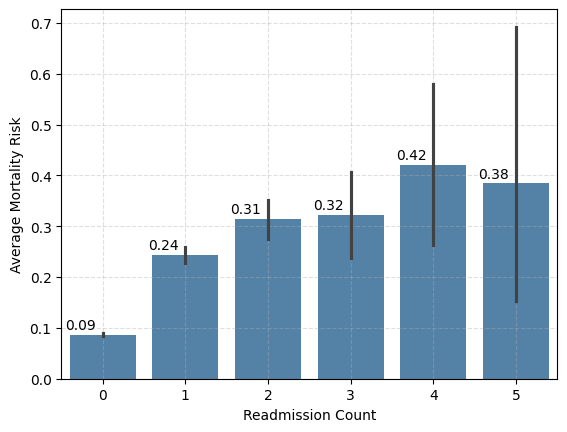

In [94]:
ax = sns.barplot(x = 'readmission_count', 
                 y = 'total_mr', 
                 data = id_table_train_last_epoch_q_0,
                 color = 'steelblue')

for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2.5,
        height + 0.005, 
        f'{height:.2f}', 
        ha = 'right', 
        va = 'bottom',
        fontsize = 10,
        color = 'black'
    )

plt.xlabel(r'Readmission Count')
plt.ylabel(r'Average Mortality Risk')

plt.grid(linestyle = '--', alpha = 0.4)

plt.savefig('../Experiment Figure/EDA_figures/qsofa_RC_MR_1.png',
            dpi = 400, 
            bbox_inches = 'tight')

plt.show()

In [95]:
id_table_train_last_epoch_first = id_table_train_last_epoch[id_table_train_last_epoch['readmission_count'] == 0]
# id_table_train_last_epoch_first = id_table_train_last_epoch_first[id_table_train_last_epoch_first['discharge_fail'] == 0]

In [96]:
id_table_train_last_epoch_first

,subject_id,hadm_id,stay_id,time,discharge_action,epoch,icu_starttime,icu_endtime,los,discharge_fail,...,discharge_fail_costs,los_costs,los_costs_scaled,safe_action,mortality_costs_md,total_los_costs,total_mr,total_rr,total_los_costs_first,qSOFA_first
0,10000032,29079034,39553978,2180-07-23 23:50:47,1.0,1,2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
8,10000690,25860671,37081114,2150-11-06 17:03:17,1.0,8,2150-11-02 19:37:00,2150-11-06 17:03:17,3.893252,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,84.0,0.0
9,10000980,26913865,39765666,2189-06-27 20:38:27,1.0,1,2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12,10001217,24597018,37067082,2157-11-21 22:08:00,1.0,3,2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,1.0,...,1.0,0.0,0.0,1.0,0.0,18.0,0.0,1.0,42.0,0.0
19,10002013,23581541,39060235,2160-05-19 17:33:33,1.0,3,2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393831,19998878,26489544,34403689,2132-10-01 15:43:11,1.0,2,2132-09-30 21:55:00,2132-10-01 15:43:11,0.741794,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0
393845,19999442,26785317,32336619,2148-11-26 13:12:15,1.0,14,2148-11-19 14:23:43,2148-11-26 13:12:15,6.950370,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,156.0,1.0
393847,19999625,25304202,31070865,2139-10-11 18:21:28,1.0,2,2139-10-10 19:18:00,2139-10-11 18:21:28,0.960741,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,1.0
393851,19999828,25744818,36075953,2149-01-10 13:11:02,1.0,4,2149-01-08 18:12:00,2149-01-10 13:11:02,1.790995,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36.0,1.0


In [97]:
id_table_train_last_epoch_first['total_los_costs_first'].describe()

count    47865.000000
mean        66.385678
std         75.700144
min          0.000000
25%         24.000000
50%         36.000000
75%         84.000000
max       1594.500000
Name: total_los_costs_first, dtype: float64

In [98]:
id_table_train_last_epoch_first['total_mr'].describe()

count    47865.000000
mean         0.081939
std          0.274274
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: total_mr, dtype: float64

In [99]:
id_table_train_last_epoch_first['total_rr'].describe()

count    47865.000000
mean         0.146746
std          0.444788
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: total_rr, dtype: float64

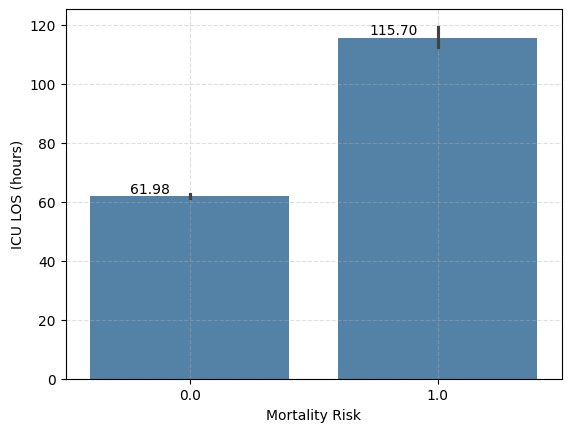

In [100]:
ax = sns.barplot(x = 'total_mr', 
                 y = 'total_los_costs_first', 
                 data = id_table_train_last_epoch_first,
                 ci = 95,
                 color = 'steelblue')

for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2.5,
        height + 0.005, 
        f'{height:.2f}', 
        ha = 'right', 
        va = 'bottom',
        fontsize = 10,
        color = 'black'
    )

plt.xlabel('Mortality Risk')
plt.ylabel('ICU LOS (hours)')

plt.grid(linestyle = '--', alpha = 0.4)

plt.savefig('../Experiment Figure/EDA_figures/mr_los_endo.png',
            dpi = 400, 
            bbox_inches = 'tight')

plt.show()

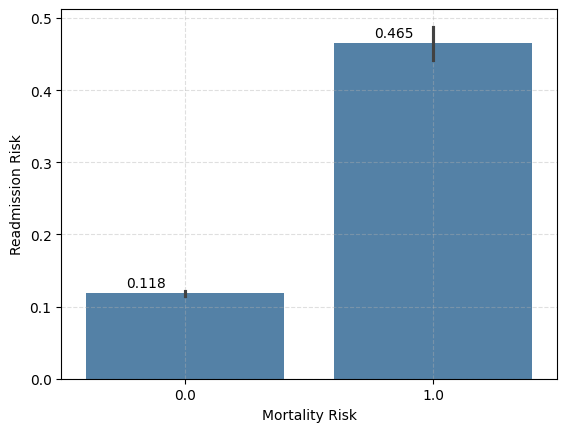

In [101]:
ax = sns.barplot(x = 'total_mr', 
                 y = 'total_rr', 
                 data = id_table_train_last_epoch_first,
                 ci = 95,
                 color = 'steelblue')

for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2.5,
        height + 0.005, 
        f'{height:.3f}', 
        ha = 'right', 
        va = 'bottom',
        fontsize = 10,
        color = 'black'
    )

plt.xlabel('Mortality Risk')
plt.ylabel('Readmission Risk')

plt.grid(linestyle = '--', alpha = 0.4)

plt.savefig('../Experiment Figure/EDA_figures/mr_rr_relationship.png',
            dpi = 400, 
            bbox_inches = 'tight')

plt.show()

- Threshold settings for readmission risk

In [103]:
id_table_train_first_epoch['discharge_fail'].describe()

count    54905.000000
mean         0.127930
std          0.334015
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: discharge_fail, dtype: float64

In [104]:
id_table_train_last_epoch['discharge_fail'].describe()

count    54905.000000
mean         0.127930
std          0.334015
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: discharge_fail, dtype: float64

In [105]:
id_table_test_last_epoch['discharge_fail'].describe()

count    6868.000000
mean        0.126820
std         0.332795
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: discharge_fail, dtype: float64

In [106]:
id_table_train_last_epoch['discharge_fail_costs'].describe()

count    54905.000000
mean         0.127930
std          0.334015
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: discharge_fail_costs, dtype: float64

In [107]:
id_table_test_last_epoch['discharge_fail_costs'].describe()

count    6868.000000
mean        0.126820
std         0.332795
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: discharge_fail_costs, dtype: float64

In [108]:
id_table_train_last_epoch['total_rr'].describe()

count    54905.000000
mean         0.159585
std          0.465667
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: total_rr, dtype: float64

In [109]:
id_table_val_last_epoch['total_rr'].describe()

count    6880.000000
mean        0.166715
std         0.470032
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: total_rr, dtype: float64

In [110]:
id_table_test_last_epoch['total_rr'].describe()

count    6868.000000
mean        0.156960
std         0.460908
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: total_rr, dtype: float64

In [111]:
# id_table_test_last_epoch[id_table_test_last_epoch['readmission_count'] == 0]['total_rr'].describe()

In [112]:
# (100 + np.mean(id_table_train_last_epoch['total_rr']))/200

In [113]:
# (100 + np.mean(id_table_test_last_epoch['total_rr']))/200

In [114]:
[np.mean(id_table_train_last_epoch['total_rr']), 
 np.mean(id_table_val_last_epoch['total_rr']),
 np.mean(id_table_test_last_epoch['total_rr'])]

[0.15958473727347236, 0.16671511627906976, 0.15695981362842168]

In [115]:
[np.mean(id_table_train_last_epoch[id_table_train_last_epoch['readmission_count'] == 0]['total_rr']), 
 np.mean(id_table_val_last_epoch[id_table_val_last_epoch['readmission_count'] == 0]['total_rr']),
 np.mean(id_table_test_last_epoch[id_table_test_last_epoch['readmission_count'] == 0]['total_rr'])]

[0.14674605661757026, 0.15485387974470943, 0.14526350900600402]

In [ ]:
# # Basic groupby with multiple aggregation functions
# stats = id_table_train_last_epoch.groupby('readmission_count')['discharge_fail_costs'].agg([
#     'count',
#     'mean',
#     'std',
#     'median',
#     'min',
#     'max'
# ]).round(2)

# # Add confidence intervals
# def ci_95(x):
#     return 1.96 * x.std() / np.sqrt(len(x))

# enhanced_stats = id_table_train_last_epoch.groupby('readmission_count')['discharge_fail_costs'].agg([
#     'count',
#     'mean',
#     'std',
#     'median',
#     ci_95,
# ]).round(2)

# # Rename columns for clarity
# enhanced_stats.columns = ['Count', 'Mean', 'Std Dev', 'Median', '95% CI']

In [ ]:
# print("\nDescriptive Statistics for Discharge Fail Costs by Readmission Count:")
# print(enhanced_stats)

- Mortality risk in training dataset

In [ ]:
# id_table_train_first_epoch.columns

In [ ]:
# id_table_train_first_epoch['death_in_ICU'].describe()

In [ ]:
# id_table_train_first_epoch['death_out_ICU'].describe()

In [ ]:
# id_table_train_last_epoch['death_out_ICU'].describe()

In [116]:
id_table_train_last_epoch['mortality_costs'].describe()

count    54905.000000
mean         0.098461
std          0.297940
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: mortality_costs, dtype: float64

In [117]:
id_table_train_last_epoch['total_mr'].describe()

count    54905.000000
mean         0.104945
std          0.306485
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: total_mr, dtype: float64

In [118]:
id_table_val_last_epoch['total_mr'].describe()

count    6880.000000
mean        0.111773
std         0.315110
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: total_mr, dtype: float64

In [119]:
id_table_test_last_epoch['mortality_costs'].describe()

count    6868.000000
mean        0.096098
std         0.294747
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: mortality_costs, dtype: float64

In [120]:
id_table_test_last_epoch['total_mr'].describe()

count    6868.000000
mean        0.102941
std         0.303904
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: total_mr, dtype: float64

In [121]:
id_table_test_last_epoch[id_table_test_last_epoch['readmission_count'] == 0]['total_mr'].describe()

count    5996.000000
mean        0.081388
std         0.273452
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: total_mr, dtype: float64

In [122]:
id_table_test_last_epoch[id_table_test_last_epoch['readmission_count'] == 0]['mortality_costs'].describe()

count    5996.000000
mean        0.076217
std         0.265368
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: mortality_costs, dtype: float64

In [123]:
id_table_test_last_epoch[id_table_test_last_epoch['readmission_count'] == 1]['total_mr'].describe()

count    715.000000
mean       0.230769
std        0.421620
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: total_mr, dtype: float64

In [124]:
id_table_test_last_epoch[id_table_test_last_epoch['readmission_count'] == 1]['mortality_costs'].describe()

count    715.000000
mean       0.220979
std        0.415197
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: mortality_costs, dtype: float64

In [125]:
id_table_test_last_epoch[id_table_test_last_epoch['readmission_count'] == 2]['total_mr'].describe()

count    122.000000
mean       0.270492
std        0.446046
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: total_mr, dtype: float64

In [126]:
id_table_test_last_epoch[id_table_test_last_epoch['readmission_count'] == 2]['mortality_costs'].describe()

count    122.000000
mean       0.221311
std        0.416842
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: mortality_costs, dtype: float64

In [127]:
id_table_test_last_epoch[id_table_test_last_epoch['readmission_count'] == 3]['total_mr'].describe()

count    23.000000
mean      0.521739
std       0.510754
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: total_mr, dtype: float64

In [128]:
id_table_test_last_epoch[id_table_test_last_epoch['readmission_count'] == 3]['mortality_costs'].describe()

count    23.000000
mean      0.434783
std       0.506870
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: mortality_costs, dtype: float64

In [129]:
# (100 + np.mean(id_table_train_last_epoch['total_mr']))/200

In [130]:
# (100 + np.mean(id_table_test_last_epoch['total_mr']))/200

In [131]:
[np.mean(id_table_train_last_epoch['total_mr']), 
 np.mean(id_table_val_last_epoch['total_mr']),
 np.mean(id_table_test_last_epoch['total_mr'])]

[0.10494490483562517, 0.11177325581395349, 0.10294117647058823]

In [132]:
[np.mean(id_table_train_last_epoch[id_table_train_last_epoch['readmission_count'] == 0]['total_mr']), 
 np.mean(id_table_val_last_epoch[id_table_val_last_epoch['readmission_count'] == 0]['total_mr']),
 np.mean(id_table_test_last_epoch[id_table_test_last_epoch['readmission_count'] == 0]['total_mr'])]

[0.08193878616943487, 0.0883439704400403, 0.08138759172781855]

In [ ]:
# # Basic groupby with multiple aggregation functions
# stats = id_table_train_last_epoch.groupby('readmission_count')['mortality_costs'].agg([
#     'count',
#     'mean',
#     'std',
#     'median',
#     'min',
#     'max'
# ]).round(2)

# # Add confidence intervals
# def ci_95(x):
#     return 1.96 * x.std() / np.sqrt(len(x))

# enhanced_stats = id_table_train_last_epoch.groupby('readmission_count')['mortality_costs'].agg([
#     'count',
#     'mean',
#     'std',
#     'median',
#     ci_95,
# ]).round(2)

# # Rename columns for clarity
# enhanced_stats.columns = ['Count', 'Mean', 'Std Dev', 'Median', '95% CI']

In [ ]:
# print("\nDescriptive Statistics for Mortality Risk Costs by Readmission Count:")
# print(enhanced_stats)

- Pearson Correlation Coefficient

In [ ]:
id_table_train_last_epoch.columns

In [ ]:
correlation = id_table_train_last_epoch['total_mr'].corr(id_table_train_last_epoch['total_rr'], method = 'pearson')

correlation_matrix = id_table_train_last_epoch[['total_mr', 'total_rr']].corr(method = 'pearson')

In [ ]:
print(correlation)

In [ ]:
correlation_matrix

In [ ]:
id_table_train_last_epoch['total_los_costs_1'] = id_table_train_first_epoch['total_los_costs'].copy()
id_table_train_last_epoch['total_los_costs_scaled_1'] = id_table_train_first_epoch['total_los_costs_scaled'].copy()

In [ ]:
correlation = id_table_train_last_epoch['total_mr'].corr(id_table_train_last_epoch['total_los_costs_1'], method = 'pearson')

correlation_matrix = id_table_train_last_epoch[['total_mr', 'total_los_costs_1']].corr(method = 'pearson')

In [ ]:
print(correlation)

In [ ]:
correlation = id_table_train_last_epoch['total_mr'].corr(id_table_train_last_epoch['total_los_costs_scaled_1'], method = 'pearson')

correlation_matrix = id_table_train_last_epoch[['total_mr', 'total_los_costs_scaled_1']].corr(method = 'pearson')

In [ ]:
print(correlation)

-  Plot

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.violinplot(x = 'total_rr', y = 'total_mr', data = id_table_train_last_epoch)
# # plt.title('Scatter Plot using Seaborn')
# plt.grid(True, linestyle = '--', alpha = 0.7)
# plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'total_rr', y = 'total_mr', data = id_table_train_last_epoch[id_table_train_last_epoch['readmission_count'] == 0])
# plt.title('Scatter Plot using Seaborn')

plt.xlabel("Cumulative Readmission Risk Costs")
plt.ylabel("Cumulative Mortality Risk Costs")
plt.grid(True, linestyle = '--', alpha = 0.7)

# plt.savefig("../Experiment Figure/EDA_figures/mortality_readmission_cost_relationship.png", 
#             dpi = 300, 
#             bbox_inches = 'tight')

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'total_rr', y = 'total_los_costs_1', data = id_table_train_last_epoch[id_table_train_last_epoch['readmission_count'] == 0])
# plt.title('Scatter Plot using Seaborn')

plt.xlabel("Cumulative Readmission Risk Costs")
plt.ylabel("Cumulative Mortality Risk Costs")
plt.grid(True, linestyle = '--', alpha = 0.7)

# plt.savefig("../Experiment Figure/EDA_figures/mortality_readmission_cost_relationship.png", 
#             dpi = 300, 
#             bbox_inches = 'tight')

plt.show()

In [ ]:
np.mean(id_table_test_last_epoch[id_table_test_last_epoch['total_rr'] == 0.0]['total_mr'])

In [ ]:
Counter(id_table_train_last_epoch['total_rr'])

In [ ]:
Counter(id_table_train_last_epoch['total_mr'])

In [ ]:
id_table_train.groupby('qSOFA')['discharge_action'].agg(['count', 'mean', 'std']).round(3)

In [ ]:
id_table_train.groupby('discharge_action')['qSOFA'].agg(['count', 'mean', 'std']).round(3)

In [ ]:
int(1) == 1.0

In [ ]:
0 < np.nan

In [ ]:
1 > np.nan

In [ ]:
Counter(id_table_train['los_costs'])

In [ ]:
np.array([12, 6, 3, 1.5, 0.75])

In [ ]:
data = np.array([12, 6, 3, 1.5, 0.75, 0.75])
labels = [0, 1, 2, 3, 4, 5]

plt.figure(figsize=(8, 4))
plt.bar(labels, data, color='skyblue', edgecolor='black')
plt.title("Value at Each Step (Halving Pattern)", fontsize=12)
plt.xlabel("Step", fontweight='bold')
plt.ylabel("Value", fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, val in enumerate(data):
    plt.text(i, val + 0.1, f"{val}", ha='center', fontsize=10)

plt.show()

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(labels, data, marker = 'o', color = '#E74C3C', linewidth = 2, markersize = 8)
# plt.title("Exponential Decay Trend", fontsize = 10)
plt.xlabel("Number of Readmissions (r)", fontweight = 'bold')
plt.ylabel(r"$H(r)$", fontweight = 'bold')
# plt.yscale('log')  # Use log scale if decay is exponential
plt.grid(True, which = 'both', linestyle = '--', alpha = 0.5)

plt.savefig("../Experiment Figure/EDA_figures/immediate_rr_function.png", 
            dpi = 300, 
            bbox_inches = 'tight')

plt.show()